In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


!pip install NRCLex

/kaggle/input/stocks-news-from-2012/BA_twitter.csv
/kaggle/input/stocks-news-from-2012/CSCO_twitter.csv
/kaggle/input/stocks-news-from-2012/VZ_twitter.csv
/kaggle/input/stocks-news-from-2012/MSFT_twitter.csv
/kaggle/input/stocks-news-from-2012/WMT_twitter.csv
/kaggle/input/stocks-news-from-2012/KO_twitter.csv
/kaggle/input/stocks-news-from-2012/INTC_twitter.csv
/kaggle/input/stocks-news-from-2012/GS_twitter.csv
/kaggle/input/stocks-news-from-2012/IBM_twitter.csv
     |████████████████████████████████| 396 kB 5.2 MB/s eta 0:00:01
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=2deb1a03ce079bb46fbd8be9f32f38c3148072201b0cdeb632cd492e04c468c3
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [2]:
path = dirname + '/' + filenames[0]
print(path)

/kaggle/input/stocks-news-from-2012/BA_twitter.csv


In [3]:
#load all required packages
#general data handling and processing
import pandas as pd
import numpy as np
#text data processing and sentiment analysis tools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nrclex import NRCLex

#visualization
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
def emotion_freq(headline):
    res1 = {'anger': 0.0, 'fear': 0.0, 'negative': 0.0, 'positive': 0.0, 'sadness': 0.0, 'trust': 0.0, 'anticipation': 0.0, 'joy': 0.0, 'disgust': 0.0, 'surprise': 0.0}
    headline = NRCLex(headline)
    freq = headline.affect_frequencies
    for k, fq in freq.items():
      res1[k] = res1.get(k, 0.0) + fq
    return res1

#function to calculate word count in each headline
def word_count(row):
    row = nltk.word_tokenize(row)
    cnt = len(row)
    return cnt

In [5]:
for filename in filenames:
    inp = dirname + '/' + filename

    bo = pd.read_csv(inp)

    bo['date'] = pd.to_datetime(bo['date'], format='%Y-%m-%d') 

    #create polarity scores
    bo['senti_score'] = bo['title'].apply(lambda headline: sia.polarity_scores(headline))

    #extract compound scores to a new column
    bo['compound']  = bo['senti_score'].apply(lambda score_dict: score_dict['compound'])

    #create a new column for sentiment labels 
    bo['senti_label'] = bo['compound'].apply(lambda c: 'positive' if c >=0.05 else 'neutral' if c>-0.05 else 'negative')

    #counts of sentiment labels
    bo['senti_label'].value_counts()

    yearly_averages = bo.resample('A',on='date').mean()
    monthly_averages = bo.resample('M',on='date').mean()

    bo_nrc = bo.iloc[:,0:2].copy()

    bo_nrc['emo_freq']=bo_nrc['title'].apply(emotion_freq)

    bo_nrc = pd.concat((bo_nrc.drop(['emo_freq'],axis=1), bo_nrc['emo_freq'].apply(pd.Series)), axis=1)

    bo_nrc['word_count']=bo_nrc['title'].apply(word_count)

    emotions = ['anger','fear','negative','positive','sadness','trust','anticipation','joy','disgust','surprise']
    for emotion in emotions:
        bo_nrc[emotion] = bo_nrc[emotion]/bo_nrc['word_count']
    
    
    bo_nrc.to_csv(filename,index=False)


In [6]:
bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2176 non-null   datetime64[ns]
 1   title        2176 non-null   object        
 2   stock        2176 non-null   object        
 3   senti_score  2176 non-null   object        
 4   compound     2176 non-null   float64       
 5   senti_label  2176 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 102.1+ KB


In [7]:
bo['date'] = pd.to_datetime(bo['date'], format='%Y-%m-%d') 

In [8]:
#create polarity scores
bo['senti_score'] = bo['title'].apply(lambda headline: sia.polarity_scores(headline))

#extract compound scores to a new column
bo['compound']  = bo['senti_score'].apply(lambda score_dict: score_dict['compound'])

#create a new column for sentiment labels 
bo['senti_label'] = bo['compound'].apply(lambda c: 'positive' if c >=0.05 else 'neutral' if c>-0.05 else 'negative')

#counts of sentiment labels
bo['senti_label'].value_counts()

neutral     1137
positive     733
negative     306
Name: senti_label, dtype: int64

In [9]:
bo

,date,title,stock,senti_score,compound,senti_label
0,2020-06-11,Shares of several technology companies are tra...,IBM,"{'neg': 0.057, 'neu': 0.746, 'pos': 0.198, 'co...",0.6705,positive
1,2020-06-11,Amazon Places One-Year Moratorium On Police Us...,IBM,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.1779,positive
2,2020-06-10,"Cloudera Analysts Examine Potential Suitors, T...",IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,2020-06-09,Shares of several technology companies are tra...,IBM,"{'neg': 0.048, 'neu': 0.764, 'pos': 0.188, 'co...",0.7506,positive
4,2020-06-09,IBM Discontinues Facial Recognition Technology...,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
...,...,...,...,...,...,...
2171,2012-11-27,AUD USD US Economic Outlook Continues to Amel...,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2172,2012-10-23,Tuesday Uncertain Bias Higher,IBM,"{'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...",-0.3818,negative
2173,2012-10-23,These Stocks And Markets May Bounce Now,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2174,2012-10-18,U S Stocks Edge Higher As Traders Digest Hous...,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [10]:
yearly_averages = bo.resample('A',on='date').mean()
monthly_averages = bo.resample('M',on='date').mean()

In [11]:
def emotion_freq(headline):
    res1 = {'anger': 0.0, 'fear': 0.0, 'negative': 0.0, 'positive': 0.0, 'sadness': 0.0, 'trust': 0.0, 'anticipation': 0.0, 'joy': 0.0, 'disgust': 0.0, 'surprise': 0.0}
    headline = NRCLex(headline)
    freq = headline.affect_frequencies
    for k, fq in freq.items():
      res1[k] = res1.get(k, 0.0) + fq
    return res1

#function to calculate word count in each headline
def word_count(row):
    row = nltk.word_tokenize(row)
    cnt = len(row)
    return cnt

In [12]:
bo

,date,title,stock,senti_score,compound,senti_label
0,2020-06-11,Shares of several technology companies are tra...,IBM,"{'neg': 0.057, 'neu': 0.746, 'pos': 0.198, 'co...",0.6705,positive
1,2020-06-11,Amazon Places One-Year Moratorium On Police Us...,IBM,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.1779,positive
2,2020-06-10,"Cloudera Analysts Examine Potential Suitors, T...",IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,2020-06-09,Shares of several technology companies are tra...,IBM,"{'neg': 0.048, 'neu': 0.764, 'pos': 0.188, 'co...",0.7506,positive
4,2020-06-09,IBM Discontinues Facial Recognition Technology...,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
...,...,...,...,...,...,...
2171,2012-11-27,AUD USD US Economic Outlook Continues to Amel...,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2172,2012-10-23,Tuesday Uncertain Bias Higher,IBM,"{'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...",-0.3818,negative
2173,2012-10-23,These Stocks And Markets May Bounce Now,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2174,2012-10-18,U S Stocks Edge Higher As Traders Digest Hous...,IBM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [13]:
bo_nrc = bo.iloc[:,0:2].copy()

In [14]:
bo_nrc['emo_freq']=bo_nrc['title'].apply(emotion_freq)


In [15]:
bo_nrc = pd.concat((bo_nrc.drop(['emo_freq'],axis=1), bo_nrc['emo_freq'].apply(pd.Series)), axis=1)

In [16]:
bo_nrc['word_count']=bo_nrc['title'].apply(word_count)

In [17]:
emotions = ['anger','fear','negative','positive','sadness','trust','anticipation','joy','disgust','surprise']
for emotion in emotions:
    bo_nrc[emotion] = bo_nrc[emotion]/bo_nrc['word_count']

In [18]:
bo_nrc

,date,title,anger,fear,negative,positive,sadness,trust,anticipation,joy,disgust,surprise,anticip,word_count
0,2020-06-11,Shares of several technology companies are tra...,0.0,0.0,0.007937,0.011905,0.003968,0.003968,0.00000,0.00000,0.0,0.00000,0.0,36
1,2020-06-11,Amazon Places One-Year Moratorium On Police Us...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.0,11
2,2020-06-10,"Cloudera Analysts Examine Potential Suitors, T...",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.0,11
3,2020-06-09,Shares of several technology companies are tra...,0.0,0.0,0.002710,0.005420,0.002710,0.005420,0.00271,0.00271,0.0,0.00271,0.0,41
4,2020-06-09,IBM Discontinues Facial Recognition Technology...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,2012-11-27,AUD USD US Economic Outlook Continues to Amel...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.0,8
2172,2012-10-23,Tuesday Uncertain Bias Higher,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.0,4
2173,2012-10-23,These Stocks And Markets May Bounce Now,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.0,7
2174,2012-10-18,U S Stocks Edge Higher As Traders Digest Hous...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.00000,0.0,12


In [19]:
bo_nrc.to_csv('BA_twitter.csv',index=False)


In [20]:
nrc_yearly_averages = bo_nrc.resample('A',on='date').mean()
nrc_monthly_averages = bo_nrc.resample('M',on='date').mean()

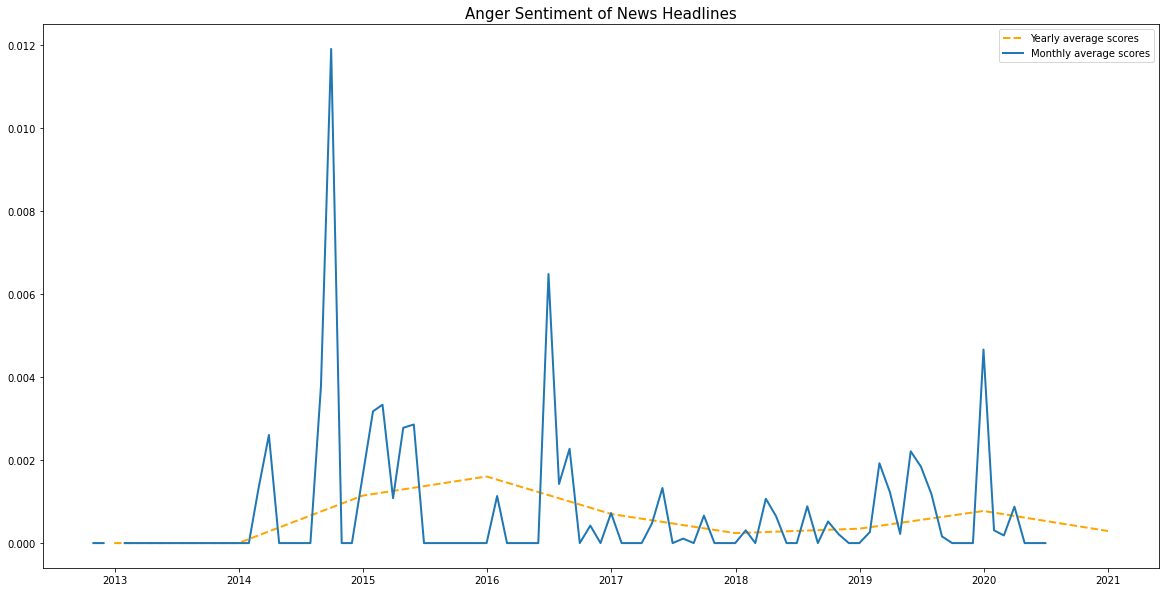

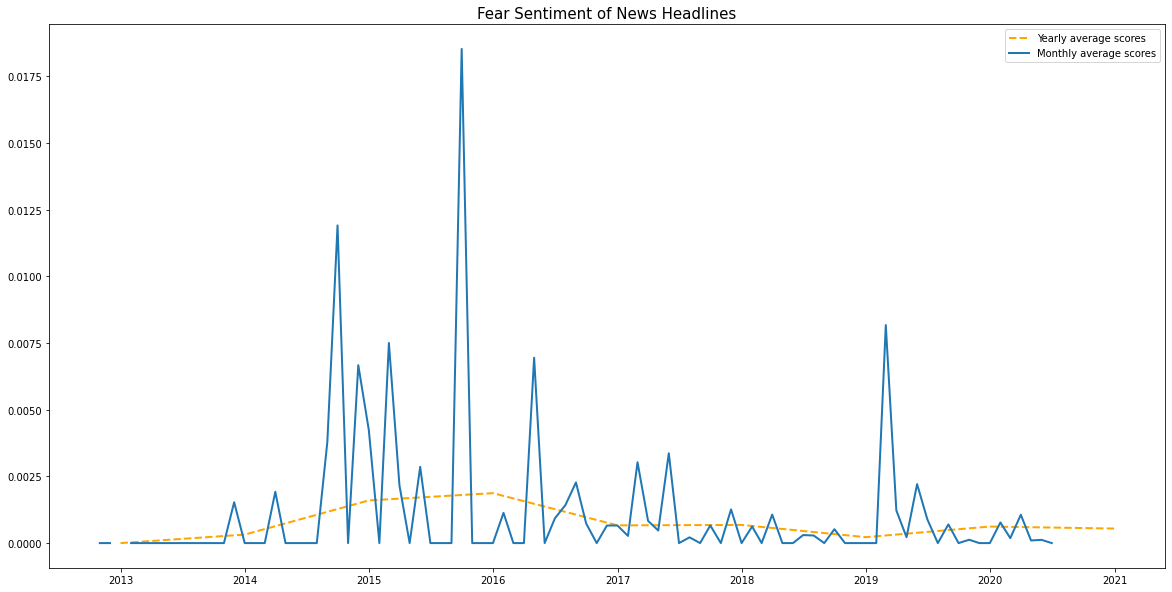

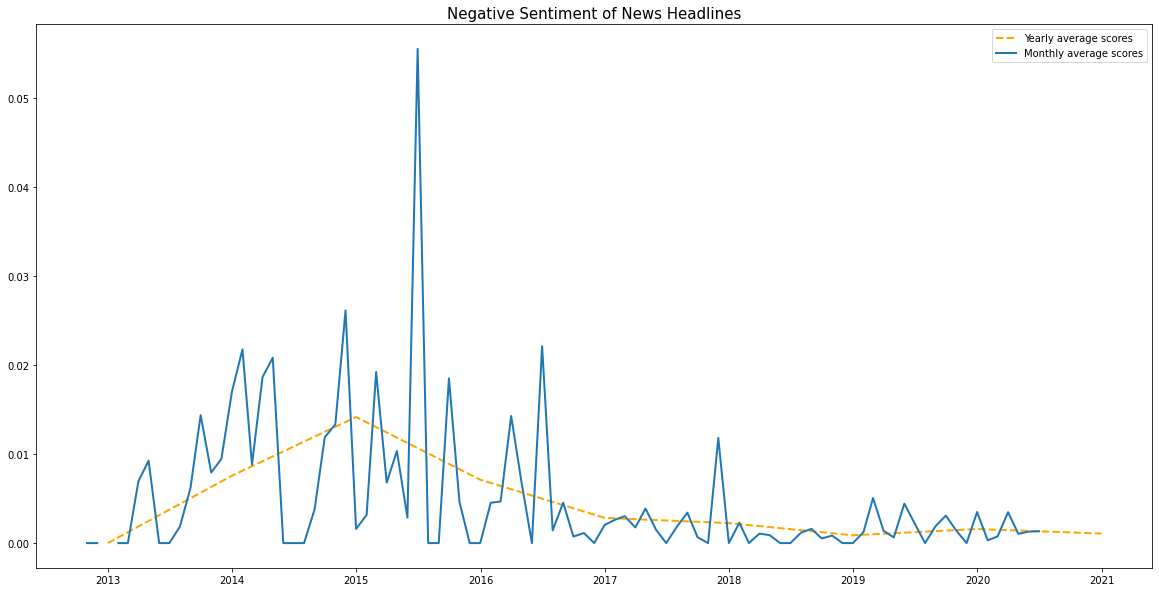

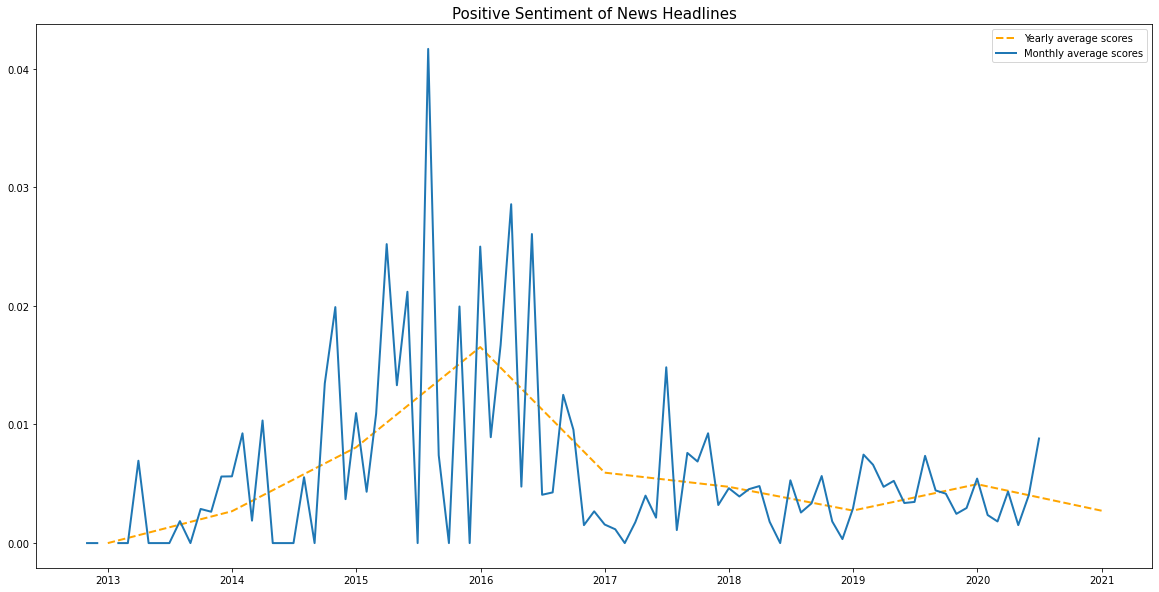

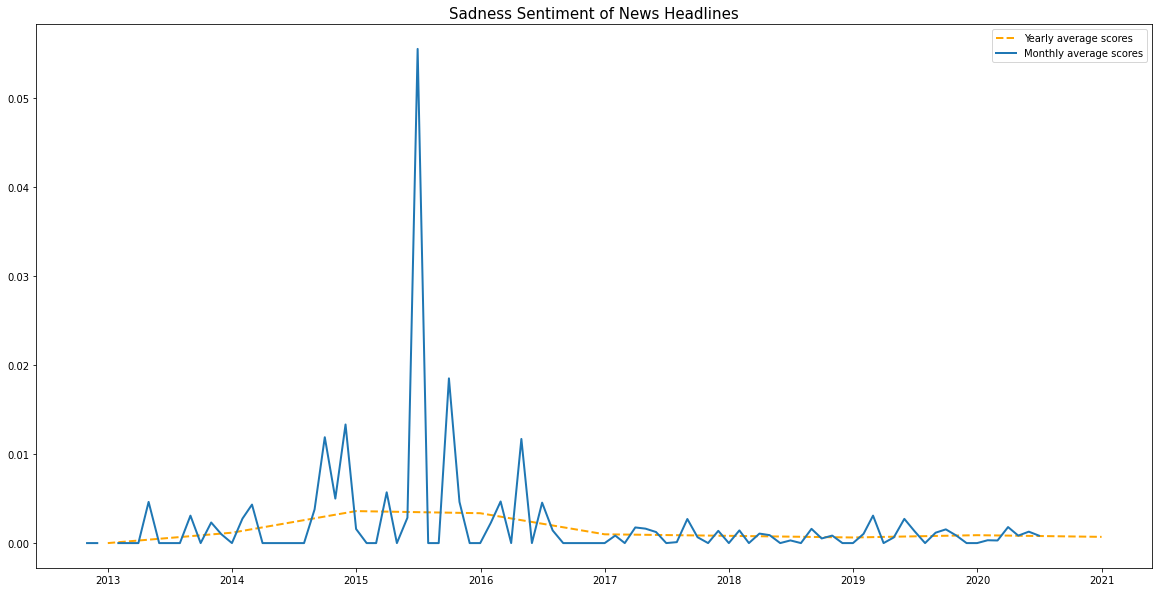

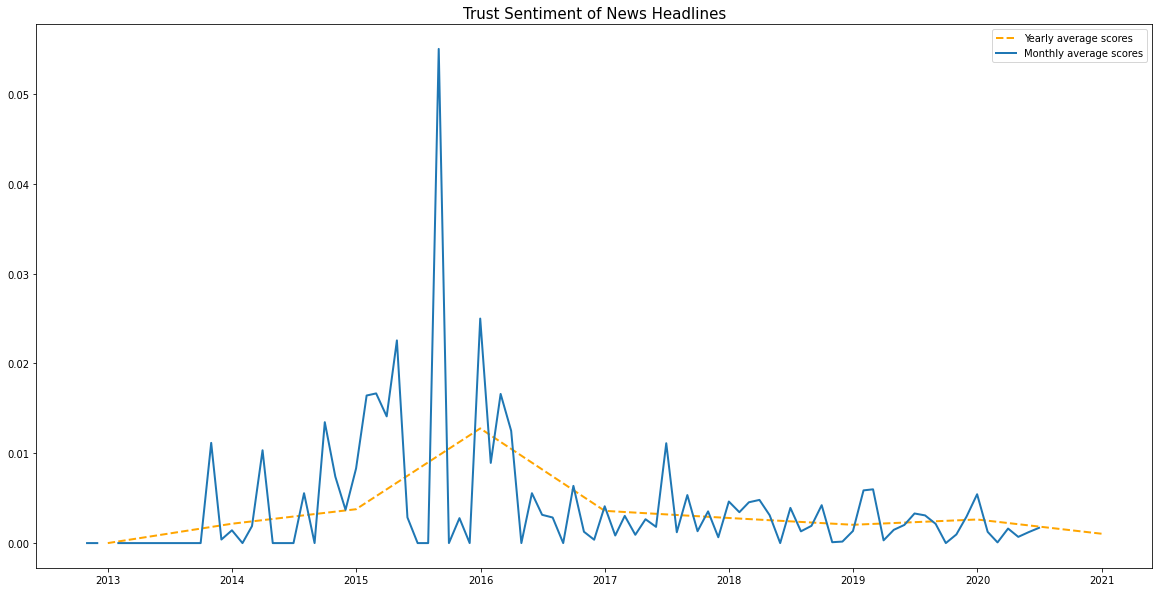

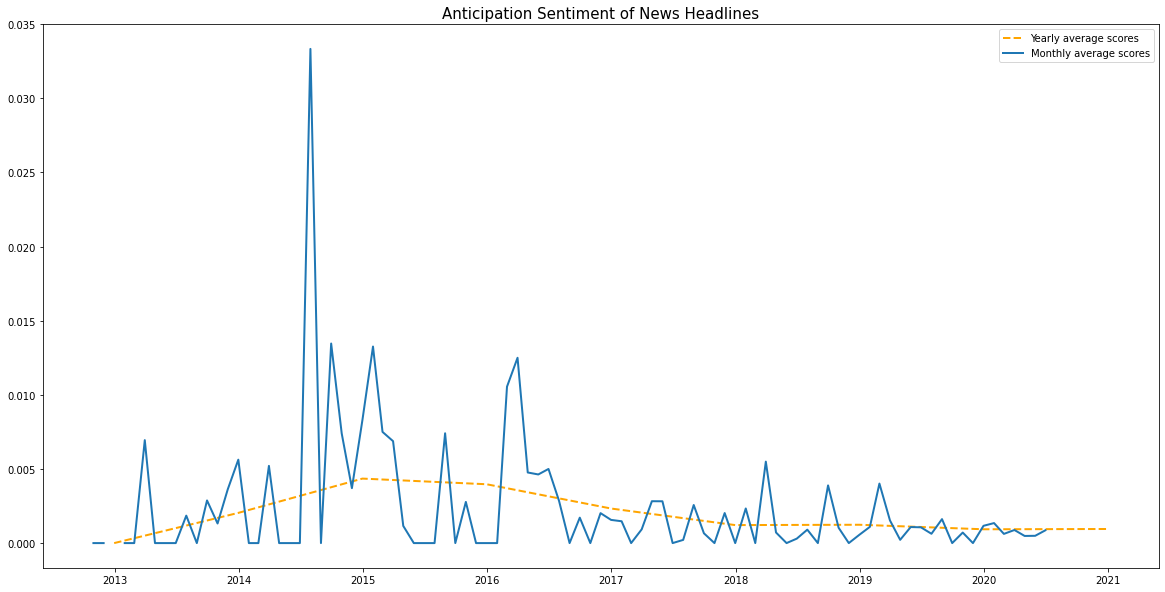

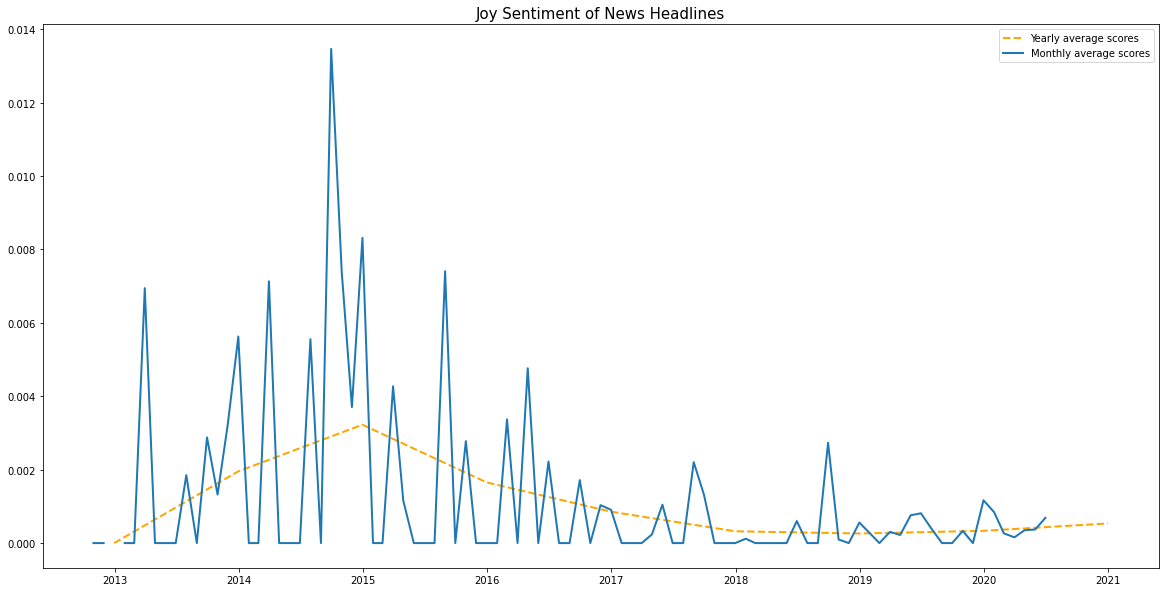

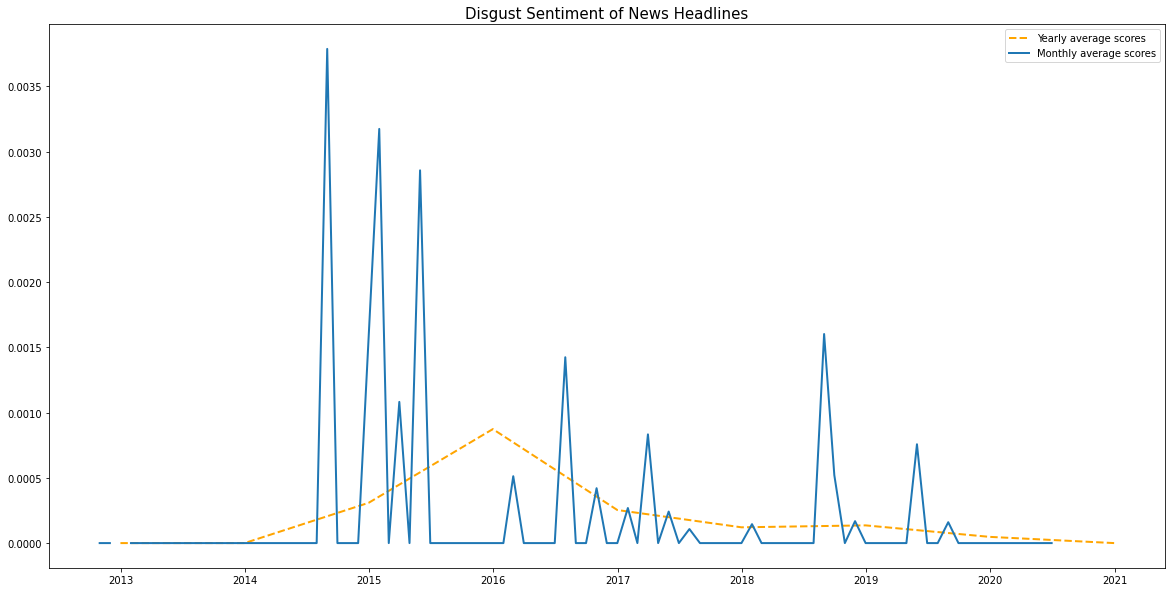

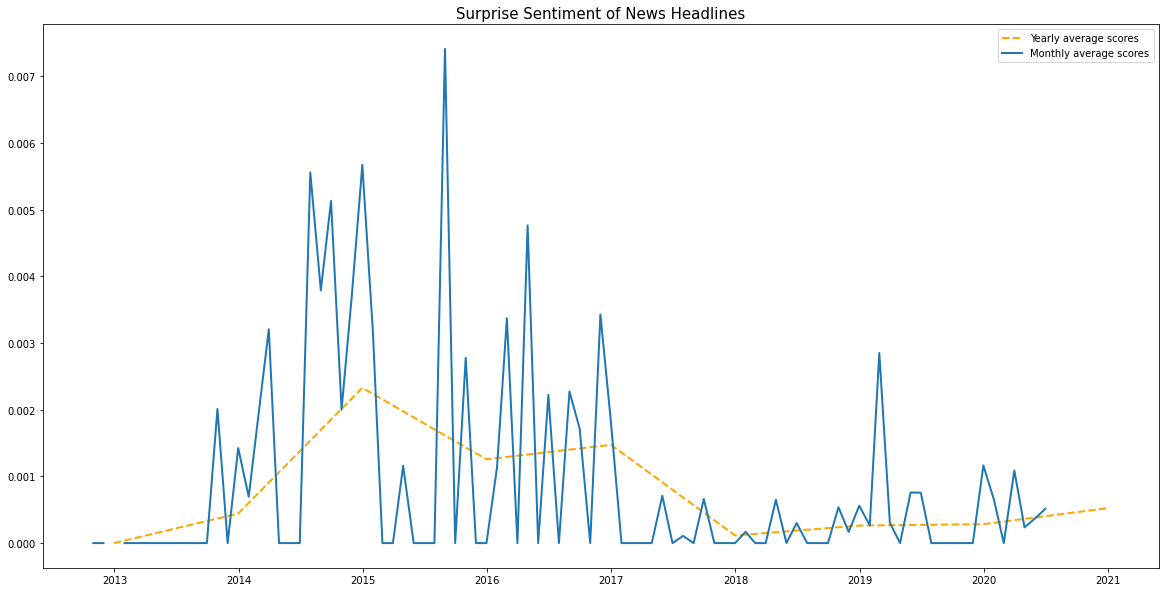

In [21]:
for emotion in emotions:
    plt.figure(figsize=(20,10))
    plt.plot(nrc_yearly_averages.index,nrc_yearly_averages[emotion], color='orange', linewidth=2, linestyle='dashed', label='Yearly average scores')
    plt.plot(nrc_monthly_averages.index, nrc_monthly_averages[emotion], color = 'tab:blue', linewidth=2, label='Monthly average scores')
    plt.title('{} Sentiment of News Headlines'.format(emotion.title()), fontsize=15)
    plt.legend()
    plt.show()